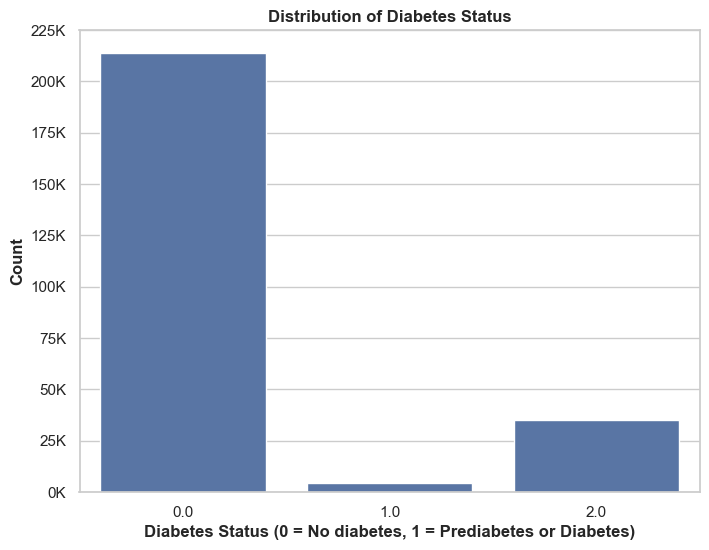

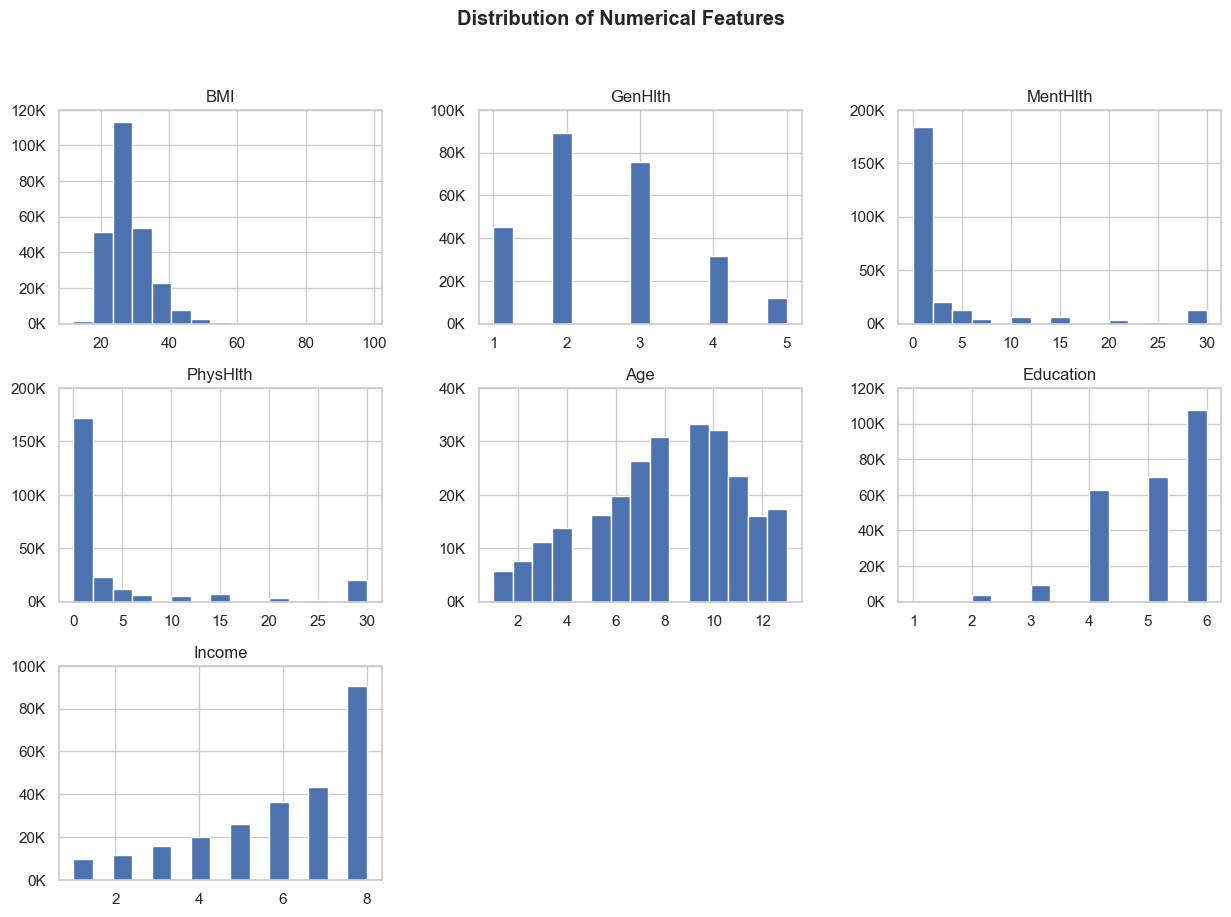

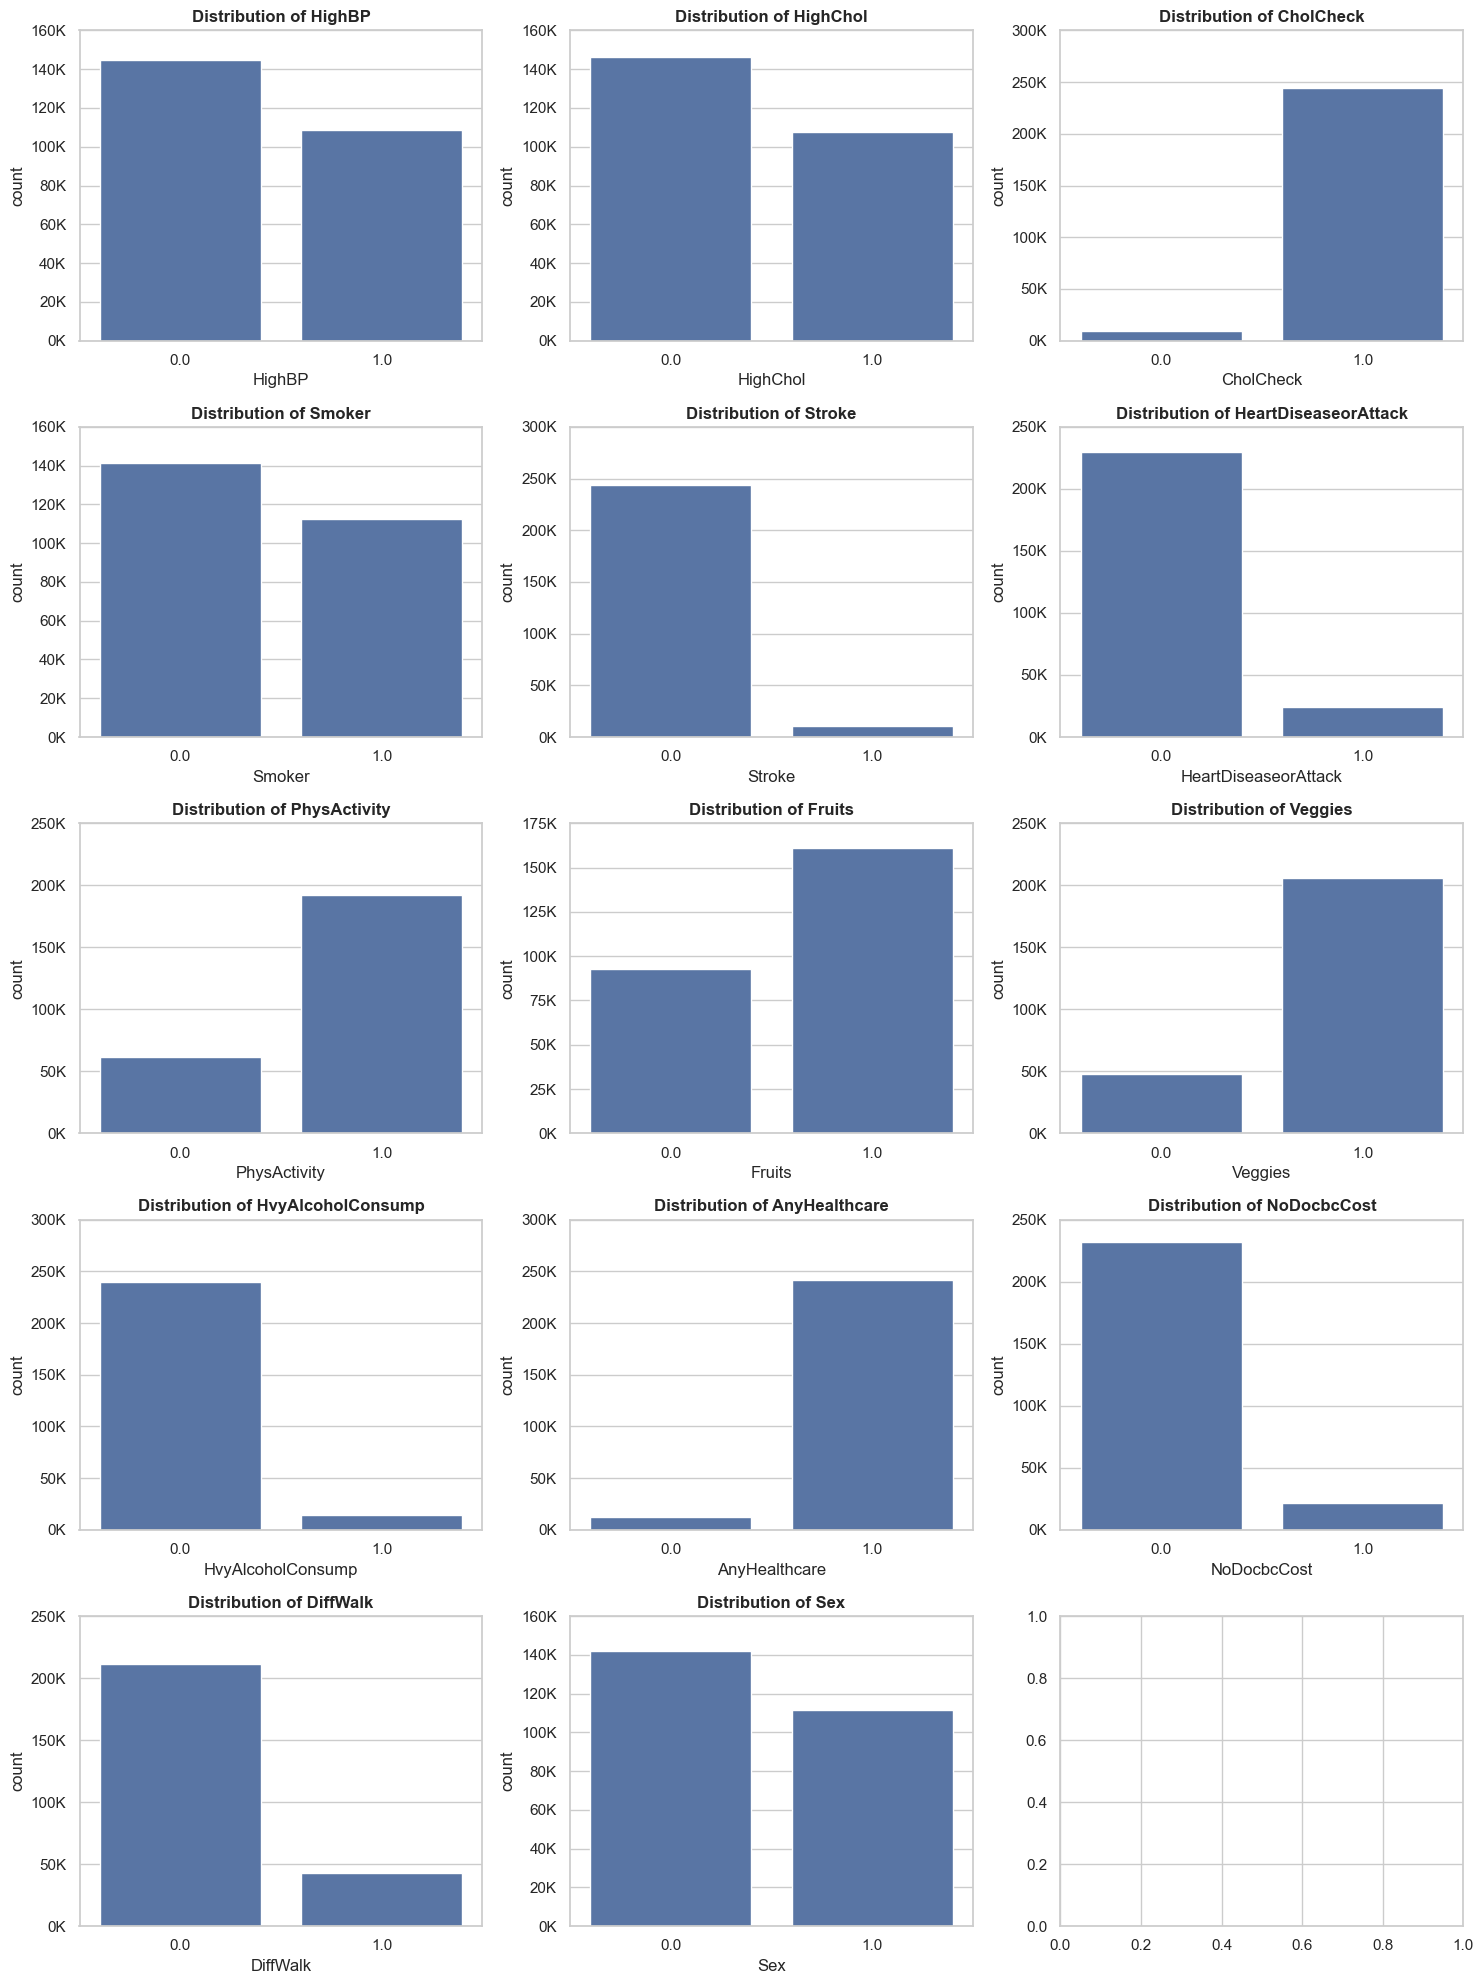

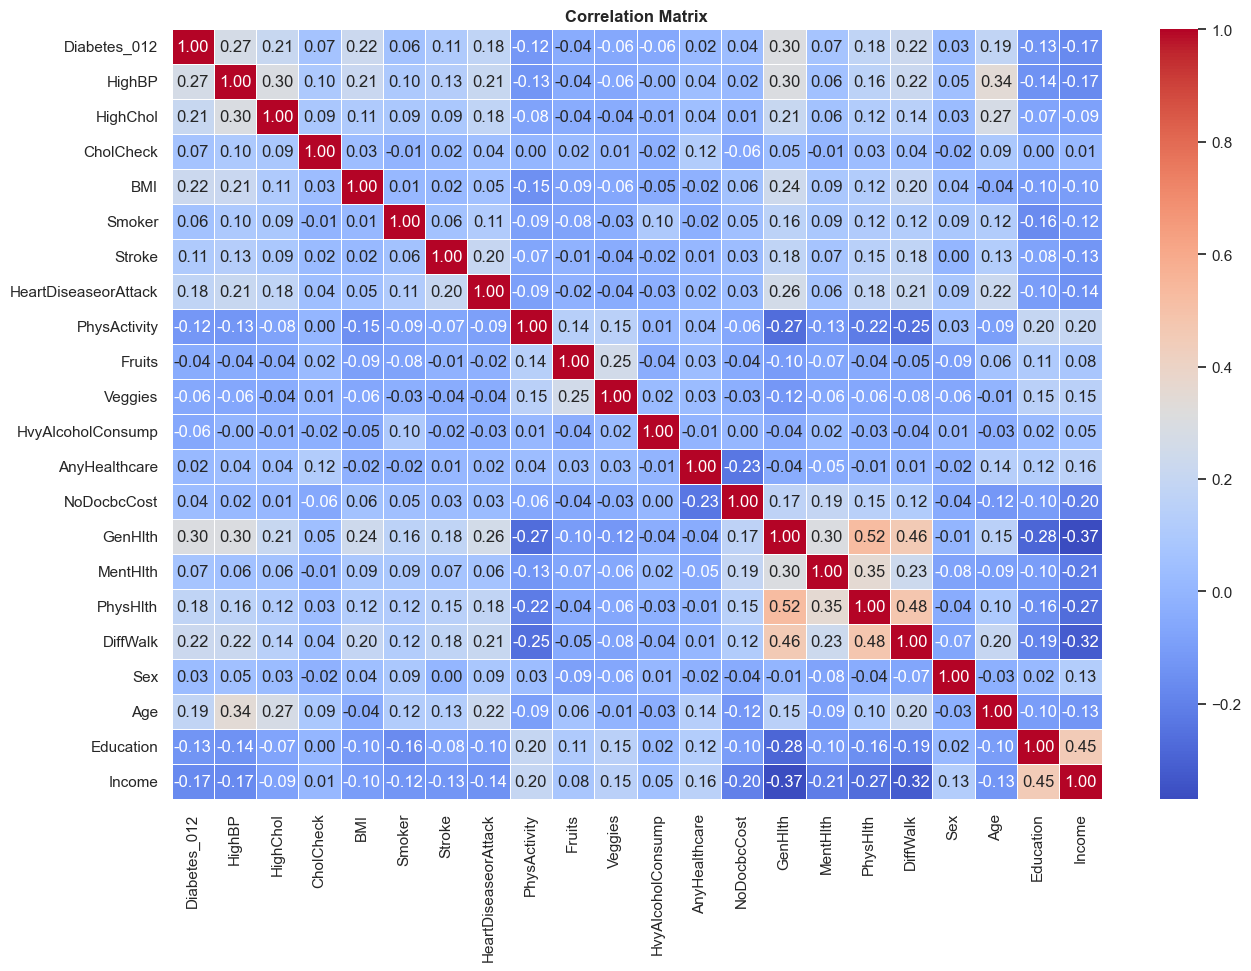

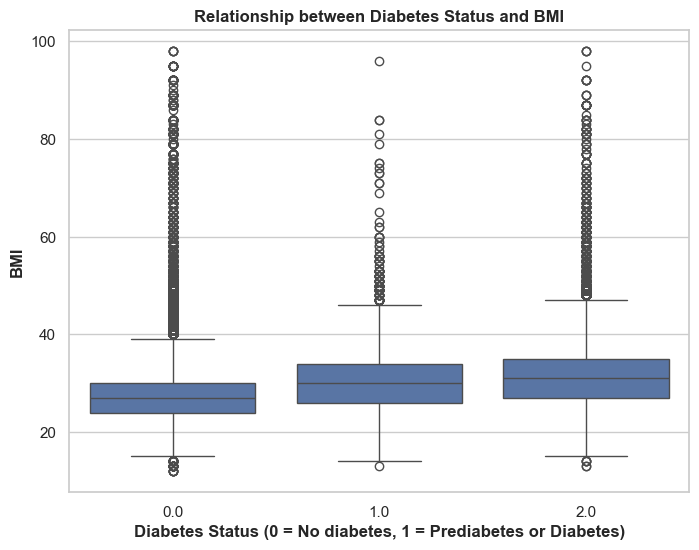

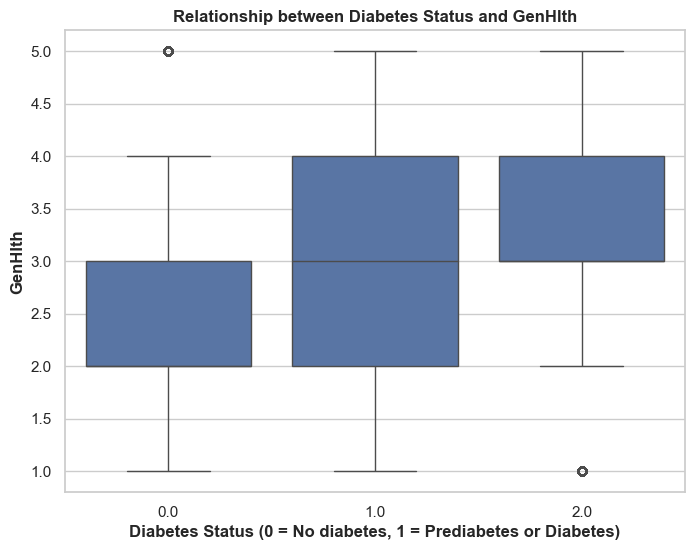

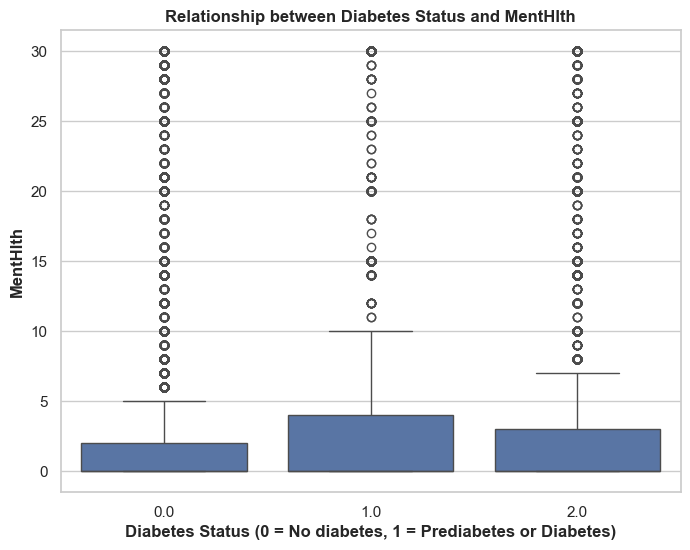

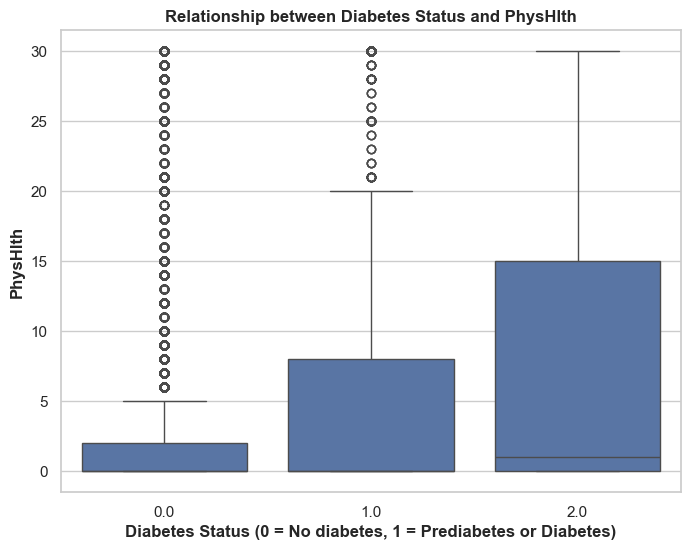

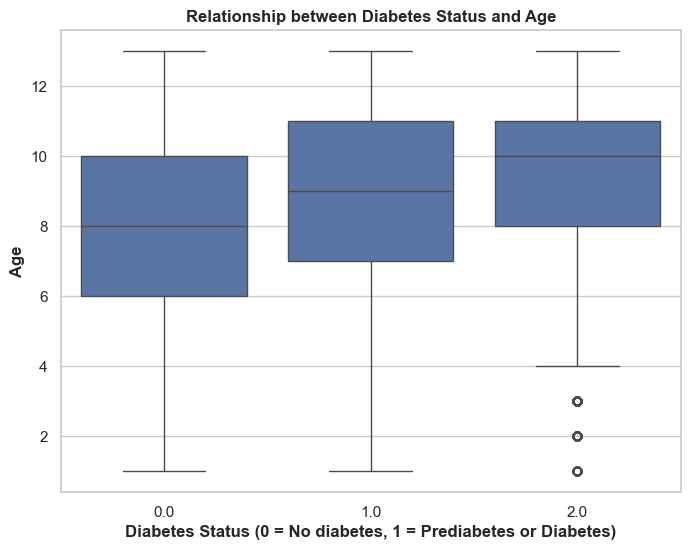

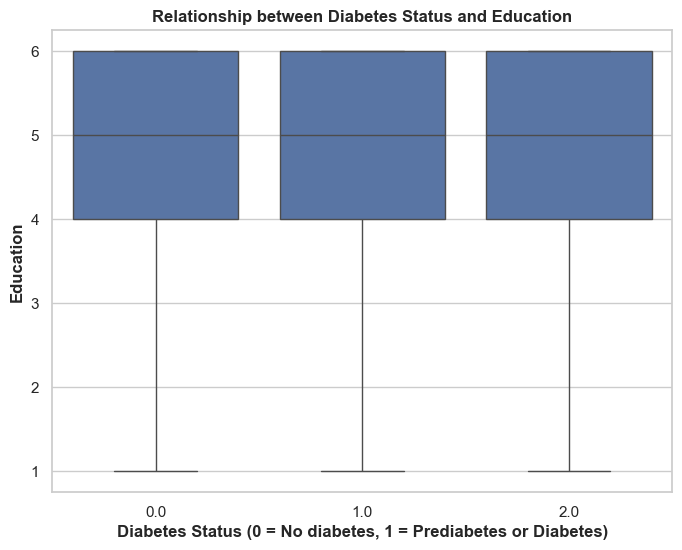

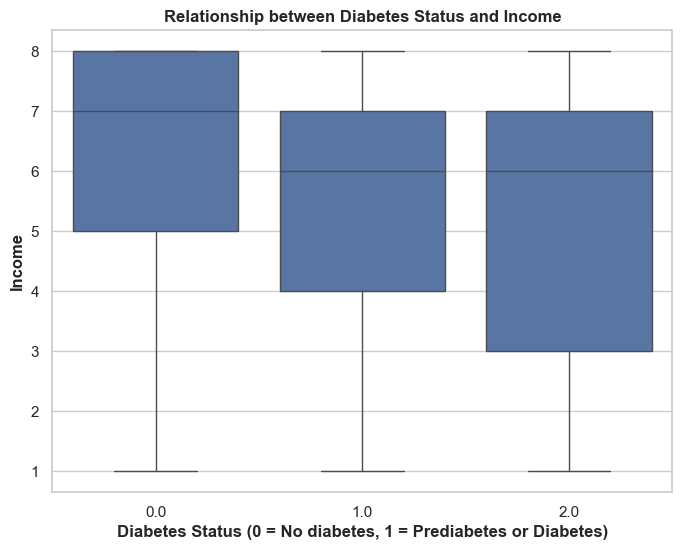

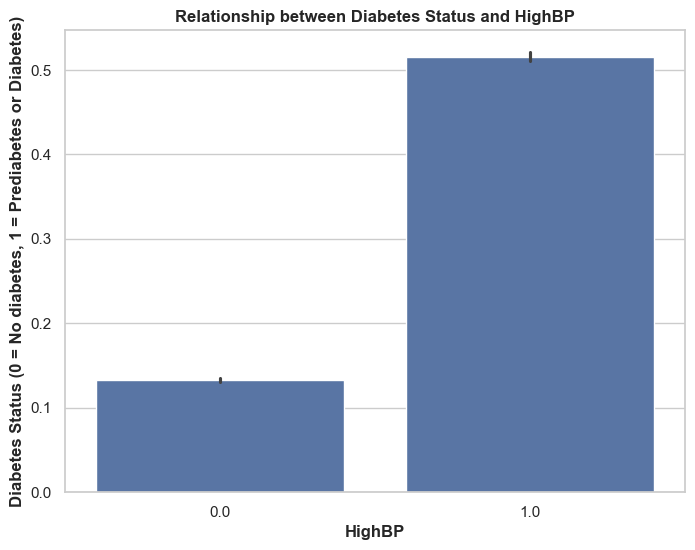

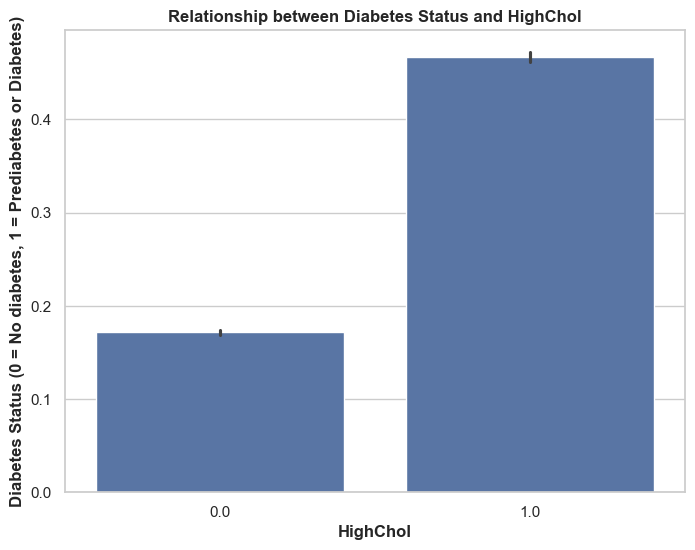

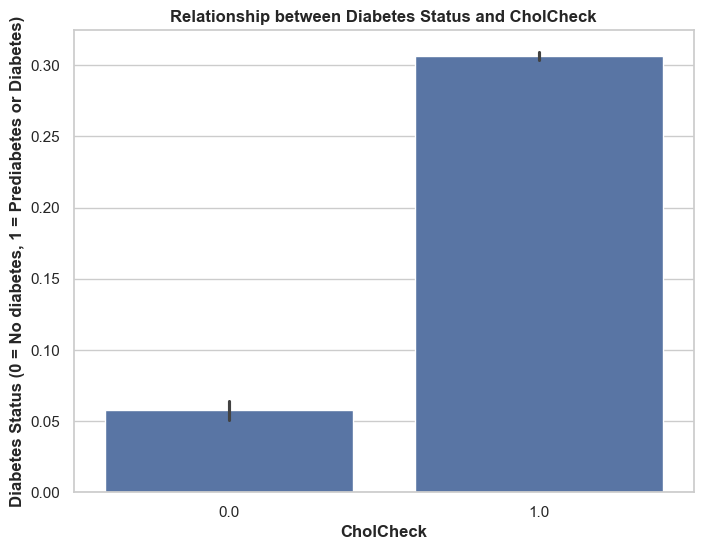

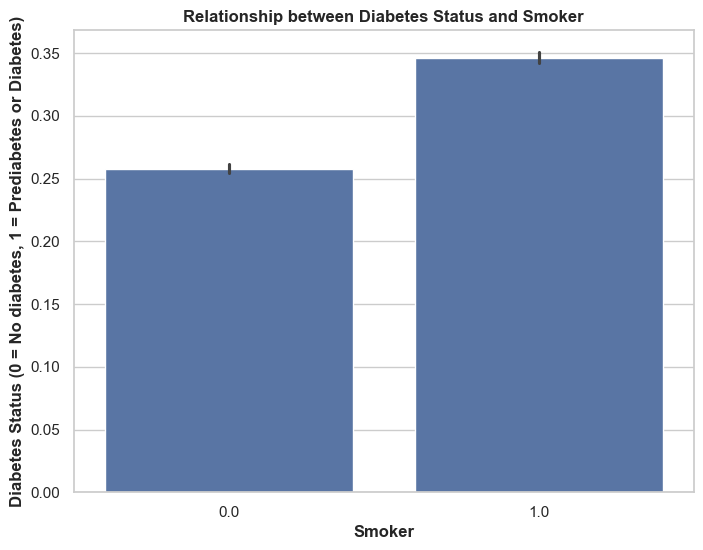

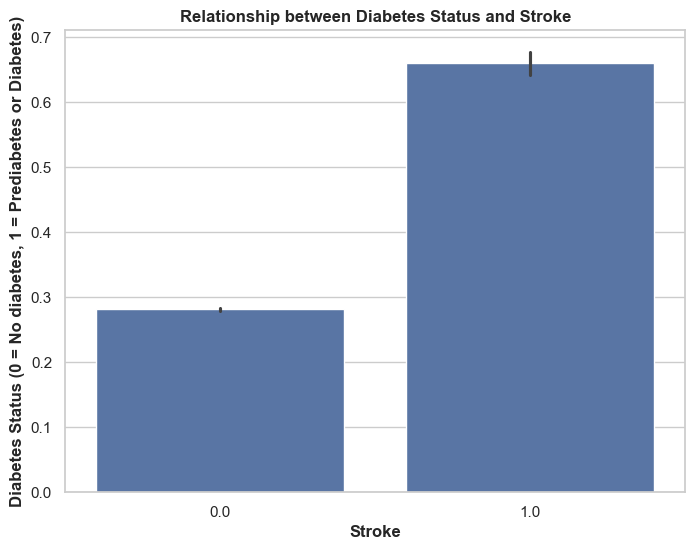

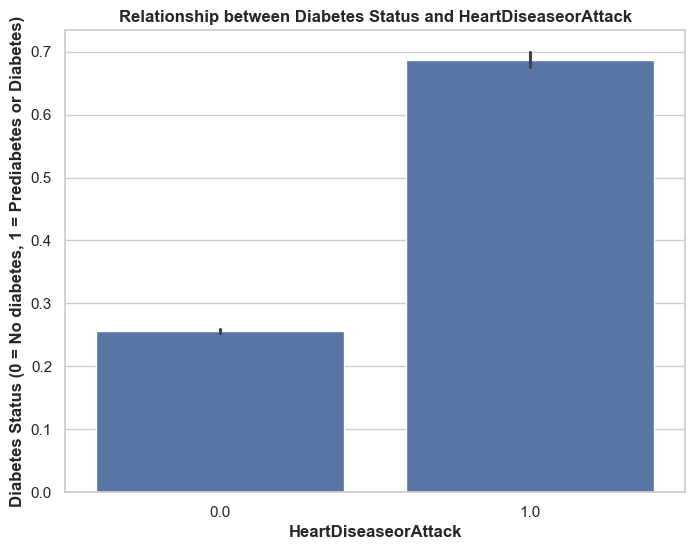

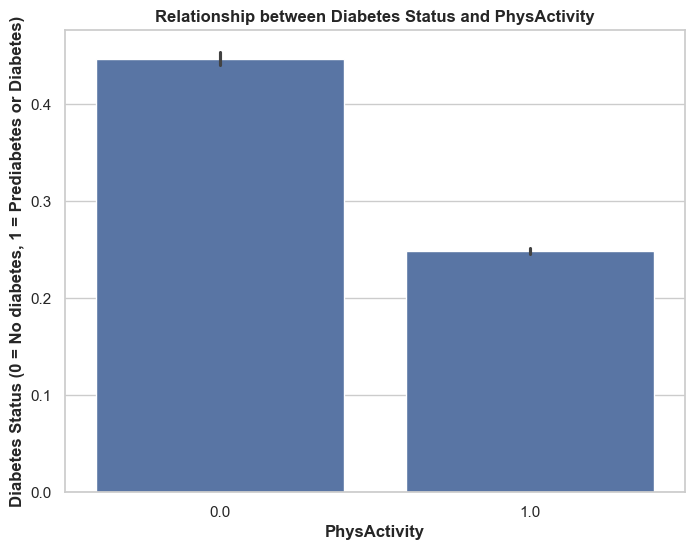

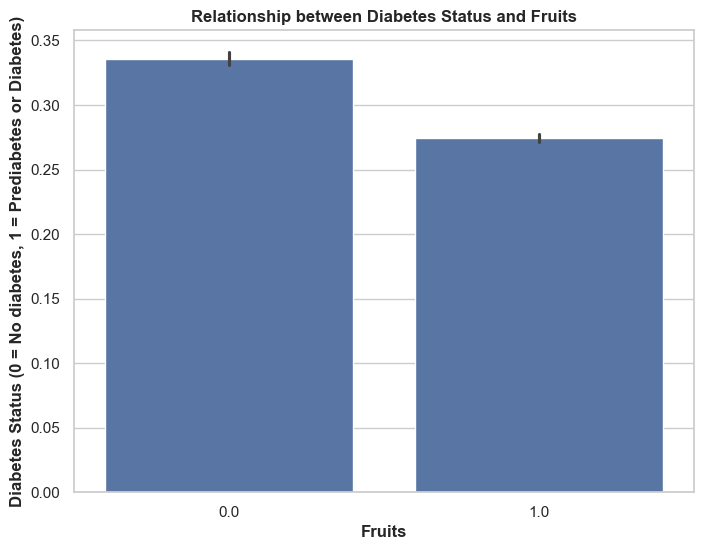

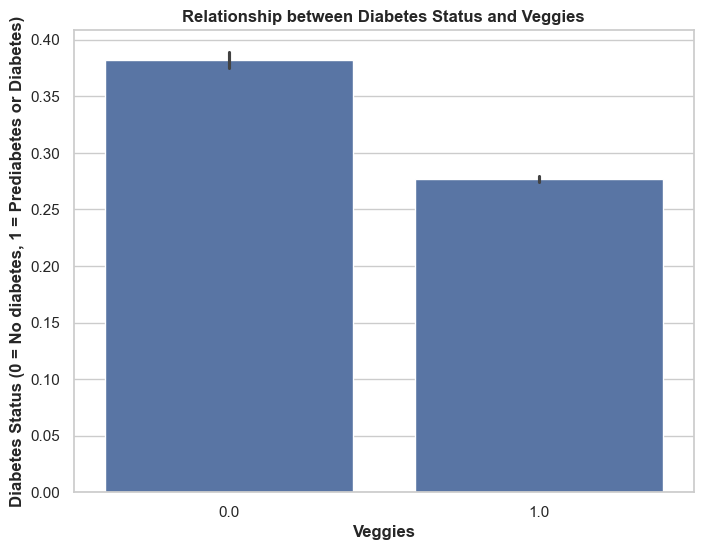

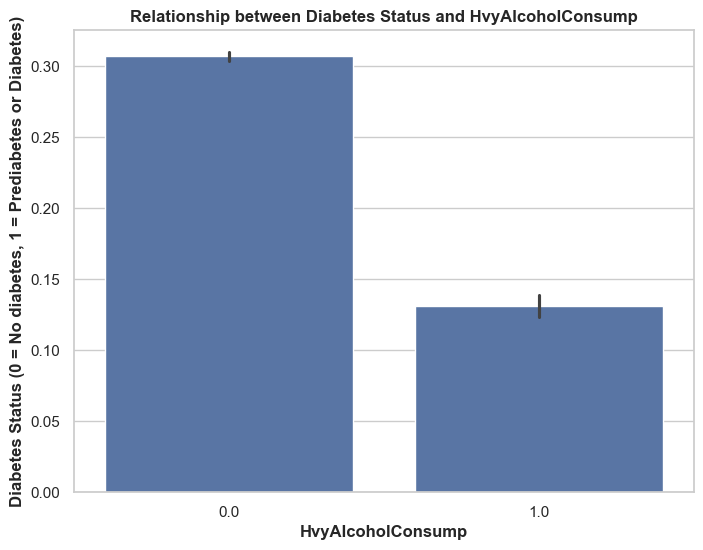

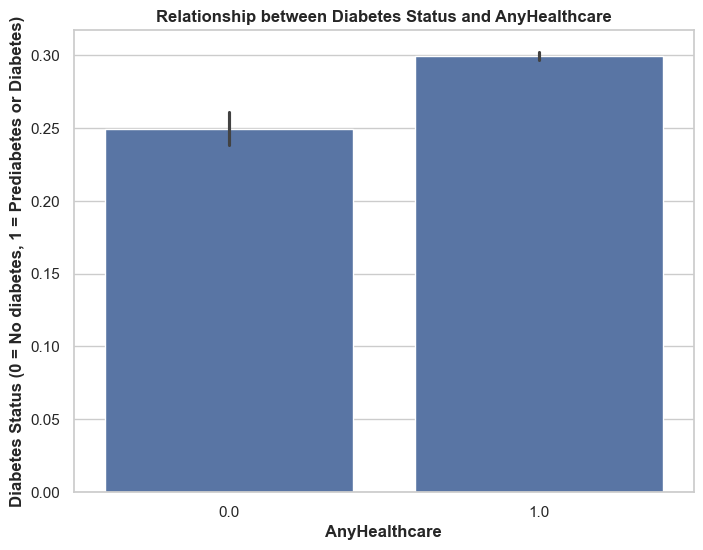

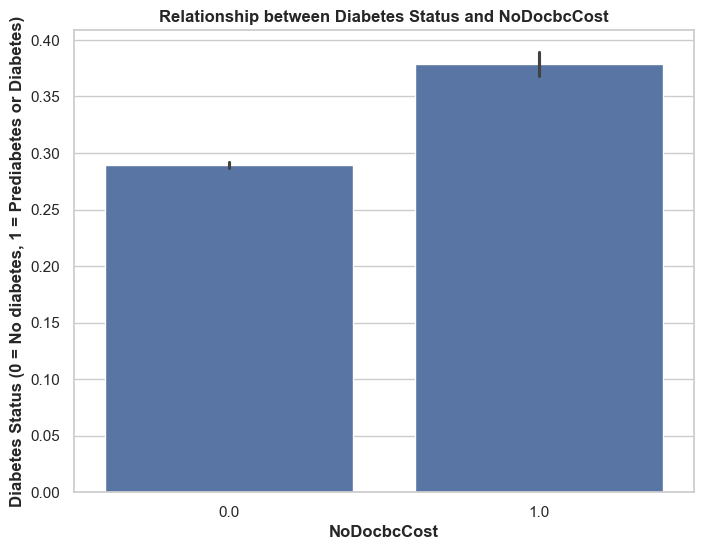

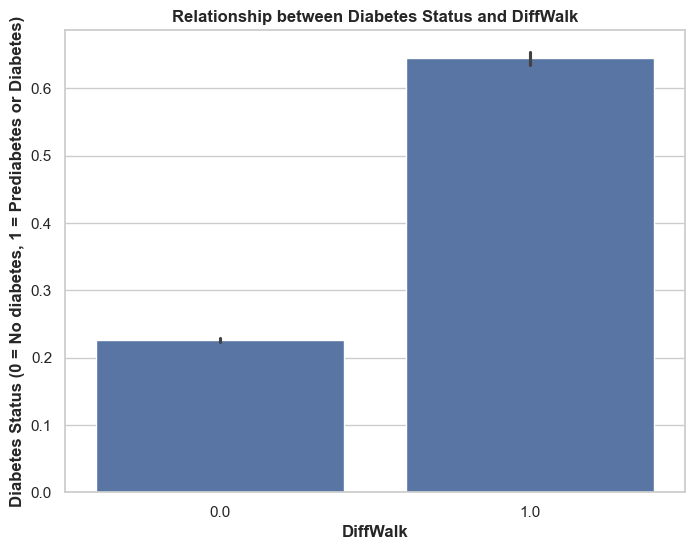

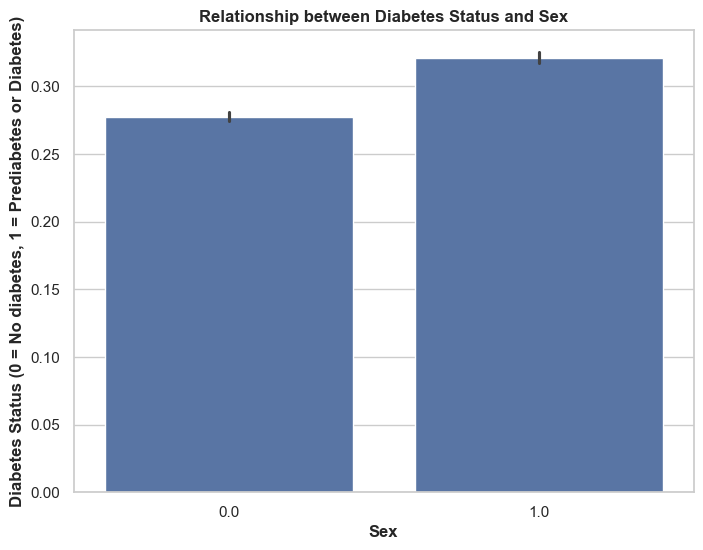

In [8]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Read the data file
df = pd.read_csv("https://raw.githubusercontent.com/bailieeg/Diabetes-Dataset/main/Diabetes%20Dataset.csv")

# Set plot style
sns.set_theme(style="whitegrid")

# Function to format y-axis labels with "K" for thousands
def format_yaxis(ax):
    ylabels = ax.get_yticks()
    ax.set_yticks(ylabels)
    ax.set_yticklabels([f'{int(y/1000)}K' for y in ylabels])

# 1. Distribution of the target variable
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Diabetes_012', data=df)
format_yaxis(ax)
plt.title('Distribution of Diabetes Status', fontweight='bold')
plt.xlabel('Diabetes Status (0 = No diabetes, 1 = Prediabetes or Diabetes)', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.show()

# 2. Distribution of numerical features
numerical_features = ['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income']
df[numerical_features].hist(bins=15, figsize=(15, 10), layout=(3, 3))
plt.suptitle('Distribution of Numerical Features', fontweight='bold')
for ax in plt.gcf().axes:
    format_yaxis(ax)
plt.show()

# 3. Distribution of binary features
binary_features = ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex']
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 20))
for i, feature in enumerate(binary_features):
    row, col = divmod(i, 3)
    ax = sns.countplot(x=feature, data=df, ax=axes[row, col])
    format_yaxis(ax)
    axes[row, col].set_title(f'Distribution of {feature}', fontweight='bold')
plt.tight_layout()
plt.show()

# 4. Correlation matrix
plt.figure(figsize=(15, 10))
corr = df.corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix', fontweight='bold')
plt.show()

# 5. Relationships between features and the target variable
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Diabetes_012', y=feature, data=df)
    plt.title(f'Relationship between Diabetes Status and {feature}', fontweight='bold')
    plt.xlabel('Diabetes Status (0 = No diabetes, 1 = Prediabetes or Diabetes)', fontweight='bold')
    plt.ylabel(feature, fontweight='bold')
    plt.show()

for feature in binary_features:
    plt.figure(figsize=(8, 6))
    sns.barplot(x=feature, y='Diabetes_012', data=df)
    plt.title(f'Relationship between Diabetes Status and {feature}', fontweight='bold')
    plt.xlabel(feature, fontweight='bold')
    plt.ylabel('Diabetes Status (0 = No diabetes, 1 = Prediabetes or Diabetes)', fontweight='bold')
    plt.show()

Chi-Square Test

In [26]:
from scipy.stats import chi2_contingency

# List of categorical columns to test
categorical_columns = ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack',
                       'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 
                       'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 
                       'Education', 'Income']

# Target variable
target = 'Diabetes_012'

# Perform Chi-Square test
chi2_results = {}
for column in categorical_columns:
    contingency_table = pd.crosstab(df[column], df[target])
    chi2, p, dof, ex = chi2_contingency(contingency_table)
    chi2_results[column] = {'chi2': chi2, 'p-value': p}

# Convert results to DataFrame
chi2_results_df = pd.DataFrame.from_dict(chi2_results, orient='index').reset_index()
chi2_results_df.columns = ['Feature', 'Chi2', 'p-value']

# Sort results by Chi2 score in descending order, then by p-value
chi2_results_df.sort_values(by=['Chi2', 'p-value'], ascending=[False, True], inplace=True)
chi2_results_df.reset_index(drop=True, inplace=True)

# Display the results
print(chi2_results_df)

                 Feature          Chi2        p-value
0                GenHlth  24248.106147   0.000000e+00
1                 HighBP  18794.644052   0.000000e+00
2               DiffWalk  12776.941889   0.000000e+00
3               HighChol  11258.920399   0.000000e+00
4                    Age   9641.376531   0.000000e+00
5               PhysHlth   8669.662295   0.000000e+00
6   HeartDiseaseorAttack   8244.889107   0.000000e+00
7                 Income   7816.462906   0.000000e+00
8              Education   4560.640279   0.000000e+00
9           PhysActivity   3789.301463   0.000000e+00
10                Stroke   2916.751980   0.000000e+00
11              MentHlth   1728.065129   0.000000e+00
12             CholCheck   1173.749358  1.329124e-255
13                Smoker   1010.511751  3.716732e-220
14               Veggies    893.841905  8.029646e-195
15     HvyAlcoholConsump    850.324048  2.261930e-185
16                Fruits    454.347059   2.186703e-99
17           NoDocbcCost    